### Decision Tree Classification on Dataset - 4

In [ ]:
import pandas as pd       
import numpy as np

In [ ]:
df=pd.read_csv('/content/dataset_4_preprocessed.csv')
df = df.drop(columns=['id'])
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70,1.015,0.0,0.0,1,0,1,1,124.0,...,37.0,6400,4.70,1,0,1,0,1,1,0
1,44.0,70,1.025,0.0,0.0,1,0,1,1,96.0,...,48.0,7800,4.40,1,1,1,0,1,1,1
2,34.0,70,1.025,0.0,0.0,1,0,1,1,87.0,...,47.0,7400,6.10,1,1,1,0,1,1,1
3,45.0,70,1.025,2.0,0.0,1,1,0,1,117.0,...,30.0,19100,3.70,1,1,1,0,1,1,0
4,42.0,80,1.020,0.0,0.0,1,0,1,1,132.0,...,50.0,5000,4.50,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,69.0,80,1.020,3.0,0.0,0,0,1,1,220.5,...,35.5,9600,4.00,0,1,1,0,1,1,0
396,67.0,90,1.020,1.0,0.0,1,1,0,1,141.0,...,41.0,10000,4.50,0,1,1,0,1,1,0
397,47.0,60,1.020,0.0,0.0,1,0,1,1,117.0,...,45.0,5200,5.60,1,1,1,0,1,1,1
398,47.0,80,1.025,0.0,0.0,1,0,1,1,124.0,...,41.0,7000,5.70,1,1,1,0,1,1,1


In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70,1.015,0.0,0.0,1,0,1,1,124.0,...,37.0,6400,4.7,1,0,1,0,1,1,0
1,44.0,70,1.025,0.0,0.0,1,0,1,1,96.0,...,48.0,7800,4.4,1,1,1,0,1,1,1
2,34.0,70,1.025,0.0,0.0,1,0,1,1,87.0,...,47.0,7400,6.1,1,1,1,0,1,1,1
3,45.0,70,1.025,2.0,0.0,1,1,0,1,117.0,...,30.0,19100,3.7,1,1,1,0,1,1,0
4,42.0,80,1.020,0.0,0.0,1,0,1,1,132.0,...,50.0,5000,4.5,1,1,1,0,1,1,1


In [ ]:
df.shape

(400, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    int64  
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    int64  
 6   pc              400 non-null    int64  
 7   pcc             400 non-null    int64  
 8   ba              400 non-null    int64  
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

In [ ]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,50.915000,76.300000,1.017177,1.03250,0.472500,0.882500,0.352500,0.895000,0.945000,149.903750,...,39.057500,8541.250000,4.702625,0.632500,0.655000,0.915000,0.207500,0.810000,0.850000,0.375000
std,17.441568,13.662051,0.005511,1.29688,1.062811,0.322418,0.478347,0.306937,0.228266,78.723272,...,8.406448,2681.171879,0.920505,0.482728,0.475964,0.279231,0.406024,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.875000,70.000000,1.012500,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,100.000000,...,33.000000,6750.000000,4.100000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,80.000000,1.017500,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,122.000000,...,41.000000,8400.000000,4.725000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,1.000000,1.000000,169.000000,...,45.000000,10000.000000,5.262500,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [ ]:
X=df.drop(columns='classification',axis=1)
Y=df['classification']
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
scaled_X=pd.DataFrame(scaled_X, columns=X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.2,random_state=54)

In [ ]:
model=tree.DecisionTreeClassifier()
model.fit(X_train,Y_train)
print(model.score(X_test,Y_test))
predicts=model.predict(X_test)

0.9375


In [ ]:
def print_result(data):
  df = pd.DataFrame((np.array(data)).reshape(1,-1), columns=X_train.columns)
  standard_data=scaler.transform(df)
  df = pd.DataFrame(standard_data, columns=X_train.columns)
  predict=model.predict(df)
  if predict==0:
    print("You are healthy")
  else:
    print("You are suffering from Chronic Kidney Disease")

In [ ]:
data=[65,75,1.010,3,0,0,1,0,1,122,42,1.7,136,4.7,12.6,45,7900,2.8,0,0,1,0,1,1]
print_result(data)
data=[75,75,1.025,3,0,1,1,0,1,128,43,280,128,4,12.6,50,10000,2.8,1,0,1,0,1,1]
print_result(data)

You are healthy
You are healthy


In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(Y_test,predicts))
print('Recall: %.3f' % recall_score(Y_test, predicts))
print('Accuracy: %.3f' % accuracy_score(Y_test, predicts))
print('F1-Score: %.3f' % f1_score(Y_test, predicts))

Precision: 0.919
Recall: 0.944
Accuracy: 0.938
F1-Score: 0.932


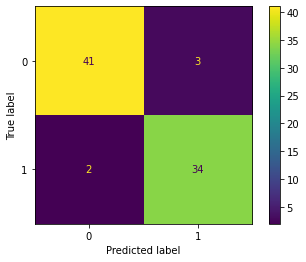

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, predicts.round())